# Numbers Summation (using RNN LSTM)

Nojus Satikauskas   
C00261186 

## Introduction

In this experiment we will use [Recurrent Neural Network](https://en.wikipedia.org/wiki/Recurrent_neural_network) (RNN) to sum up two numbers (each number is in a range of `[1, 99]`). The summation expression (i.e. `"1+45"` or `37+68`) that will be sent to the RNN _input_ will be treated as a **string** (sequence of characters) and the _output_ of the RNN will also be a string (i.e. `"46"` or `"106"`) - the sequence of characters that will represent the result of summation. This is a "sequence-to-sequence" version of RNN implementation. We will use LSTM ([Long Short-Term Memory](https://en.wikipedia.org/wiki/Long_short-term_memory)) recurent neural network for this task.

For this experiment we will use [Tensorflow v2](https://www.tensorflow.org/) with its [Keras API](https://www.tensorflow.org/guide/keras).

![numbers_summation_rnn.png](https://github.com/trekhleb/machine-learning-experiments/blob/master/demos/src/images/numbers_summation_rnn.png?raw=1)

## Theory   
RNN LSTM networks are specialized for sequence tasks, addressing the vanishing gradient problem. They use a memory cell controlled by gates to remember long-term dependencies. In the experiment, an LSTM-based RNN is trained to add two numbers represented as character sequences. The network employs an encoder-decoder architecture to process the input and generate the output sequence. By training on input-output pairs, the network learns to accurately predict the result of addition.

## Pros and Cons
**Pros**    
- Effective for handling sequential data: RNN LSTM networks excel at processing sequences due to their ability to capture long-term dependencies.   
- Suitable for various sequence-to-sequence tasks: The encoder-decoder architecture allows RNN LSTMs to tackle tasks like translation, summarization, and generation where input and output are both sequences. 
- Robust memory retention: LSTM cells maintain a memory state, enabling the network to retain information over long sequences and mitigate the vanishing gradient problem.       

**Cons**    
- Computational complexity: Training RNN LSTM models can be computationally intensive, especially for large datasets and complex architectures, which may require substantial computational resources.  
- Vulnerable to vanishing and exploding gradients: While LSTMs mitigate the vanishing gradient problem to some extent, it can still occur in deep or poorly configured networks, leading to training instability.   
- Limited parallelization: RNN LSTM computations are inherently sequential, limiting their ability to take advantage of parallel processing architectures fully. This can result in slower training times compared to other network types.

## Chang Log

### Change 1:   
- Decreased the Epoch size to 100 from 200
- Increased the Batch_size size to 256 from 128
Results are as follows in accuracy: 
**Before**  
Epoch 1/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.1862 - loss: 2.3932 - val_accuracy: 0.3873 - val_loss: 2.0880
Epoch 200/200
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 1.0000 - loss: 0.0070 - val_accuracy: 0.9987 - val_loss: 0.0112
**After**   
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.1710 - loss: 2.4369 - val_accuracy: 0.1673 - val_loss: 2.2641
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8827 - loss: 0.4309 - val_accuracy: 0.8580 - val_loss: 0.4680 

- Increasing the number of units in LSTM layers to 256 enhances the model's capacity to capture complex patterns but also escalates the risk of overfitting, where the model memorizes training data instead of generalizing, leading to poorer performance on new data.  
- Reducing epochs from 200 to 100 limits the model's learning opportunities, hindering its ability to converge to an optimal solution and resulting in decreased accuracy due to insufficient training.

### Change 2:
- Adjust learning rate from (0.001) -> (0.003)  
Results:
**Before**  
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.1710 - loss: 2.4369 - val_accuracy: 0.1673 - val_loss: 2.2641
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8827 - loss: 0.4309 - val_accuracy: 0.8580 - val_loss: 0.4680 
**After**   
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.1867 - loss: 2.3760 - val_accuracy: 0.3753 - val_loss: 2.1096
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9999 - loss: 0.0051 - val_accuracy: 0.9967 - val_loss: 0.0150 

- During training, the model's convergence is usually accelerated by increasing the learning rate from 0.001 to 0.003. In this instance, the model most likely reached a lower training loss more quickly due to the increased learning rate. As a result, after modifying the learning rate, the model obtained greater accuracy on the training and validation sets, indicating enhanced performance and quicker learning.    

### Change 3:
- Add dropout rate = (0.4)  
Results:
**Before**  
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.1867 - loss: 2.3760 - val_accuracy: 0.3753 - val_loss: 2.1096
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9999 - loss: 0.0051 - val_accuracy: 0.9967 - val_loss: 0.0150 
**After**   
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.1994 - loss: 2.3956 - val_accuracy: 0.3667 - val_loss: 2.1002
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7004 - loss: 0.6710 - val_accuracy: 0.9987 - val_loss: 0.0098

- Overshooting the ideal learning rate could be the cause of the accuracy decline following the learning rate adjustment. The model may have taken greater steps during optimization as a result of increasing the learning rate from 0.001 to 0.003, which could have led to the model missing the optimal point in the parameter space. As a result, even though the training loss was improved, the model's performance declined, resulting in less accuracy on the validation set.

### Change 4:   
- Change units within layer to 256
- Added another layer of LSTM of 256 units this is the performace difference
Results:
**Before**  
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.1994 - loss: 2.3956 - val_accuracy: 0.3667 - val_loss: 2.1002
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7004 - loss: 0.6710 - val_accuracy: 0.9987 - val_loss: 0.0098
**After**   
Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.1755 - loss: 2.4040 - val_accuracy: 0.3927 - val_loss: 2.0982
Epoch 100/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6981 - loss: 0.6843 - val_accuracy: 0.9920 - val_loss: 0.0395     

- Increasing the LSTM units from 128 to 256 and adding another LSTM layer had a mixed impact. While there was a slight increase in loss and a minor decrease in accuracy, the model's performance remained relatively stable. However, training time per epoch increased, suggesting a rise in computational cost. Further optimization may be needed to improve performance.

Inspired by [Learn to Add Numbers with an Encoder-Decoder LSTM Recurrent Neural Network](https://machinelearningmastery.com/learn-add-numbers-seq2seq-recurrent-neural-networks/) article.

## Import dependencies

In [192]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import platform
import random
import math
import datetime
import keras

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', keras.__version__)

Python version: 3.10.11
Tensorflow version: 2.16.1
Keras version: 3.2.0


## Configuring Tensorboard

We will use [Tensorboard](https://www.tensorflow.org/tensorboard) to debug the model later.

In [193]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Generate a dataset

In order to train a neural network we need to generate a training dataset which will consist of examples `x` (set of summation expressions) and labels `y` (set of correct answers for each expression). We will start with generating a set of _numbers_ (not strings so far) and than we will convert the sets of numbers into _strings_.

In [194]:
dataset_size = 5000
sequence_length = 2
max_num = 100

In [195]:
# Generates summation sequences and summation results in form of vector if numbers.
def generate_sums(dataset_size, sequence_length, max_num):
    # Initial dataset states.
    x, y = [], []

    # Generating sums.
    for i in range(dataset_size):
        sequence = [random.randint(1, max_num) for _ in range(sequence_length)]
        x.append(sequence)
        y.append(sum(sequence))

    return x, y

In [196]:
x_train, y_train = generate_sums(
    dataset_size=dataset_size,
    sequence_length=sequence_length,
    max_num=max_num
)

print('x_train:\n', x_train[:3])
print()
print('y_train:\n', y_train[:3])

x_train:
 [[34, 14], [71, 70], [41, 90]]

y_train:
 [48, 141, 131]


Recurrent neural networks are normally deals with the sequences (of one or many elements) on the input. In order to treat a summation expression as a sequence we will convert array of numbers (i.e. `[[13, 8], [85, 91], ...]`) into strings (i.e. `['13+8   ', '85+91  ', ...]`). We also want to add a space `" "` paddings to each string to make them all of the same length. After doing that we will be able to feed our RNN character by character (i.e. `1`, then `3`, then `+`, then `8`, then ` ` and so on).

In [197]:
# Convert array of numbers for x and y into strings.
# Also it adds a space (" ") padding to strings to make them of the same length.
def dataset_to_strings(x, y, max_num):
    # Initial dataset states.
    x_str, y_str = [], []

    sequnce_length = len(x[0])

    # Calculate the maximum length of equation (x) string (i.e. of "11+99")
    num_of_pluses = sequnce_length - 1
    num_of_chars_per_digit = math.ceil(math.log10(max_num + 1))
    max_x_length = sequnce_length * num_of_chars_per_digit + num_of_pluses

    # Calculate the maximum length of label (y) string (i.e. of "167")
    max_y_length = math.ceil(math.log10(sequnce_length * (max_num + 1)))

    # Add a space " " padding to equation strings to make them of the same length.
    for example in x:
        str_example = '+'.join([str(digit) for digit in example])
        str_example += ''.join([' ' for padding in range(max_x_length - len(str_example))])
        x_str.append(str_example)

    # Add a space " " padding to labels strings to make them of the same length.
    for label in y:
        str_example = str(label)
        str_example += ''.join([' ' for padding in range(max_y_length - len(str_example))])
        y_str.append(str_example)

    return x_str, y_str

In [198]:
x_train_str, y_train_str = dataset_to_strings(x_train, y_train, max_num)

print('x_train_str:\n', np.array(x_train_str[:3]))
print()
print('y_train_str:\n', np.array(y_train_str[:3]))

x_train_str:
 ['34+14  ' '71+70  ' '41+90  ']

y_train_str:
 ['48 ' '141' '131']


In [199]:
# Since we allow only numbers, plus sign and spaces the vocabulary looks pretty simple.
vocabulary = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', ' ']

In [200]:
# Python dictionary that will convert a character to its index in the vocabulary.
char_to_index = {char: index for index, char in enumerate(vocabulary)}

print(char_to_index)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '+': 10, ' ': 11}


Our RNN need to have a digits as an input to operate with (and not a strings). To convert summation expressions strings into number the first step we will do is to convert each character of each string into the position index of this character in the `vocabulary`.

In [201]:
# Converts x and y arrays of strings into array of char indices.
def dataset_to_indices(x, y, vocabulary):
    x_encoded, y_encoded = [], []

    char_to_index = {char: index for index, char in enumerate(vocabulary)}

    for example in x:
        example_encoded = [char_to_index[char] for char in example]
        x_encoded.append(example_encoded)

    for label in y:
        label_encoded = [char_to_index[char] for char in label]
        y_encoded.append(label_encoded)

    return x_encoded, y_encoded

In [202]:
x_train_encoded, y_train_encoded = dataset_to_indices(
    x_train_str,
    y_train_str,
    vocabulary
)

print('x_train_encoded:\n', np.array(x_train_encoded[:3]))
print()
print('y_train_encoded:\n', np.array(y_train_encoded[:3]))

x_train_encoded:
 [[ 3  4 10  1  4 11 11]
 [ 7  1 10  7  0 11 11]
 [ 4  1 10  9  0 11 11]]

y_train_encoded:
 [[ 4  8 11]
 [ 1  4  1]
 [ 1  3  1]]


To make our dataset even more understandable for our recurrent neural network we will convert each number into `0/1` [one-hot vector](https://en.wikipedia.org/wiki/One-hot) (i.e. number `1` will be transformed into array `[0 1 0 0 0 0 0 0 0 0 0 0]`).

In [203]:
# Convert x and y sets of numbers into one-hot vectors.
def dataset_to_one_hot(x, y, vocabulary):
    x_encoded, y_encoded = [], []

    for example in x:
        pattern = []
        for index in example:
            vector = [0 for _ in range(len(vocabulary))]
            vector[index] = 1
            pattern.append(vector)
        x_encoded.append(pattern)

    for label in y:
        pattern = []
        for index in label:
            vector = [0 for _ in range(len(vocabulary))]
            vector[index] = 1
            pattern.append(vector)
        y_encoded.append(pattern)

    return x_encoded, y_encoded

In [204]:
x_train_one_hot, y_train_one_hot = dataset_to_one_hot(
    x_train_encoded,
    y_train_encoded,
    vocabulary
)

print('x_train_one_hot:\n', np.array(x_train_one_hot[:1]))
print()
print('y_train_one_hot:\n', np.array(y_train_one_hot[:1]))

x_train_one_hot:
 [[[0 0 0 1 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]]]

y_train_one_hot:
 [[[0 0 0 0 1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]]]


Now we may combine all the function together and create a one function that will do all the work to generate a dataset in the proper format for us.

In [205]:
# Generates a dataset.
def generate_dataset(dataset_size, sequence_length, max_num, vocabulary):
    # Generate integet sum sequences.
    x, y = generate_sums(dataset_size, sequence_length, max_num)
    # Convert integer sum sequences into strings.
    x, y = dataset_to_strings(x, y, max_num)
    # Encode each character to a char indices.
    x, y = dataset_to_indices(x, y, vocabulary)
    # Encode each index into one-hot vector.
    x, y = dataset_to_one_hot(x, y, vocabulary)
    # Return the data.
    return np.array(x), np.array(y)

In [206]:
x, y = generate_dataset(
    dataset_size,
    sequence_length,
    max_num,
    vocabulary
)

print('x:\n', x[:1])
print()
print('y:\n', y[:1])

x:
 [[[0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]]]

y:
 [[[0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1 0 0 0 0]
  [0 0 0 0 0 1 0 0 0 0 0 0]]]


In [207]:
print('x.shape: ', x.shape) # (input_sequences_num, input_sequence_length, supported_symbols_num)
print('y.shape: ', y.shape) # (output_sequences_num, output_sequence_length, supported_symbols_num)

x.shape:  (5000, 7, 12)
y.shape:  (5000, 3, 12)


In [208]:
# How many characters each summation expression has.
input_sequence_length = x.shape[1]

# How many characters the output sequence of the RNN has.
output_sequence_length = y.shape[1]

# The length of one-hot vector for each character in the input (should be the same as vocabulary_size).
supported_symbols_num = x.shape[2]

# The number of different characters our RNN network could work with (i.e. it understands only digits, "+" and " ").
vocabulary_size = len(vocabulary)

print('input_sequence_length: ', input_sequence_length)
print('output_sequence_length: ', output_sequence_length)
print('supported_symbols_num: ', supported_symbols_num)
print('vocabulary_size: ', vocabulary_size)

input_sequence_length:  7
output_sequence_length:  3
supported_symbols_num:  12
vocabulary_size:  12


In [209]:
# Converts a sequence (array) of one-hot encoded vectors back into the string based on the provided vocabulary.
def decode(sequence, vocabulary):
    index_to_char = {index: char for index, char in enumerate(vocabulary)}
    strings = []
    for char_vector in sequence:
        char = index_to_char[np.argmax(char_vector)]
        strings.append(char)
    return ''.join(strings)

In [210]:
decode(y[0], vocabulary)

'175'

## Build a model

We will use a [Sequential] TensorFlow model with [LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) layers. Logically our model will consist of **encoder** and **decoder**. _Encoder_ will encode the input expression into an array of numbers. And then _decoder_ will try to build an output result sequence by decoding the array of numbers from encoder.

In [211]:
epochs_num = 100
batch_size = 256

In [212]:
model = tf.keras.models.Sequential()

# Encoder
# -------

model.add(tf.keras.layers.LSTM(
    units=128,
    input_shape=(input_sequence_length, vocabulary_size),
    recurrent_initializer=tf.keras.initializers.GlorotNormal()
))

# Decoder
# -------

# We need this layer to match the encoder output shape with decoder input shape.
# Encoder outputs ONE vector of numbers but for decoder we need have output_sequence_length vectors.
model.add(tf.keras.layers.RepeatVector(
    n=output_sequence_length,
))

model.add(tf.keras.layers.LSTM(
    units=256,
    return_sequences=True,
    recurrent_initializer=tf.keras.initializers.GlorotNormal()
))

model.add(tf.keras.layers.LSTM(
    units=256,
    return_sequences=True,
    recurrent_initializer=tf.keras.initializers.GlorotNormal()
))

model.add(tf.keras.layers.TimeDistributed(
    layer=tf.keras.layers.Dense(
        units=vocabulary_size,
    )
))

model.add(tf.keras.layers.Dropout(0.4))

model.add(tf.keras.layers.Activation(
    activation='softmax'
))

In [213]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 128)            │        72,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector_6 (RepeatVector)  │ (None, 3, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 3, 256)         │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 3, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed_6              │ (None, 3, 12)          │         3,084 │
│ (TimeDistributed)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 12)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 3, 12)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 994,828 (3.79 MB)

 Trainable params: 994,828 (3.79 MB)

 Non-trainable params: 0 (0.00 B)

In [214]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


## Train a model

In [215]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [216]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.003)
model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.categorical_crossentropy,
    metrics=['accuracy'],
)

In [217]:
history = model.fit(
    x=x,
    y=y,
    epochs=epochs_num,
    batch_size=batch_size,
    validation_split=0.1,
    callbacks=[tensorboard_callback]
)

Epoch 1/100


18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.1755 - loss: 2.4040 - val_accuracy: 0.3927 - val_loss: 2.0982
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2605 - loss: 2.1797 - val_accuracy: 0.3973 - val_loss: 1.8854
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2700 - loss: 2.0522 - val_accuracy: 0.4020 - val_loss: 1.8272
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.2671 - loss: 2.0190 - val_accuracy: 0.4007 - val_loss: 1.7395
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3009 - loss: 1.9595 - val_accuracy: 0.3987 - val_loss: 1.7506
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.3114 - loss: 1.9454 - val_accuracy: 0.4127 - val_loss: 1.6952
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3142 - loss: 1.9275 - val_accuracy: 0.4187 - val_loss: 1.6423
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.3413 - loss: 1.8427 - val_accuracy: 0.4400 - val_l

In [218]:
# Renders the charts for training accuracy and loss.
def render_training_history(training_history):
    loss = training_history.history['loss']
    val_loss = training_history.history['val_loss']

    accuracy = training_history.history['accuracy']
    val_accuracy = training_history.history['val_accuracy']

    plt.figure(figsize=(14, 4))

    plt.subplot(1, 2, 1)
    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.plot(val_loss, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.subplot(1, 2, 2)
    plt.title('Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(accuracy, label='Training set')
    plt.plot(val_accuracy, label='Test set', linestyle='--')
    plt.legend()
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)

    plt.show()

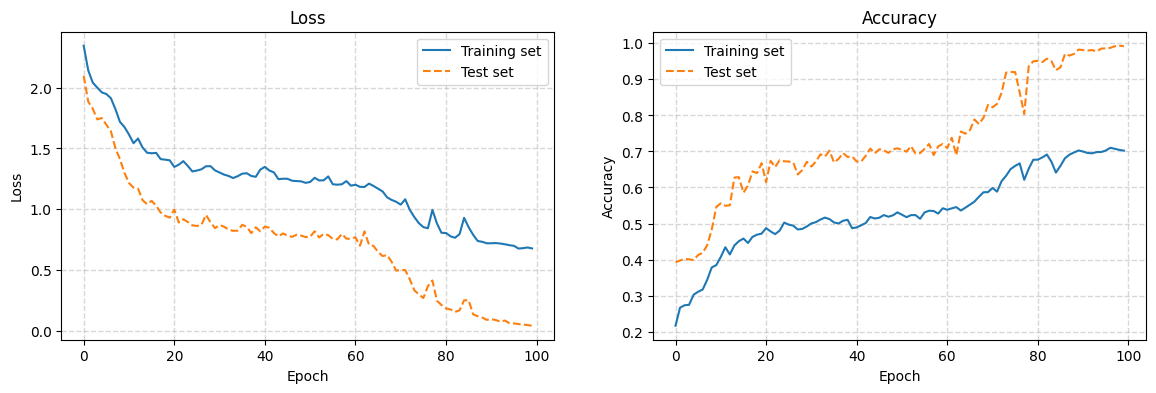

In [219]:
render_training_history(history)

## Test a dataset

In [220]:
x_test, y_test = generate_dataset(dataset_size, sequence_length, max_num, vocabulary)

print('x_test:\n', x_test[:1])
print()
print('y_test:\n', y_test[:1])

x_test:
 [[[0 0 0 0 0 0 0 0 1 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0]
  [0 0 1 0 0 0 0 0 0 0 0 0]
  [0 1 0 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]
  [0 0 0 0 0 0 0 0 0 0 0 1]]]

y_test:
 [[[0 0 1 0 0 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0 0 0 1]]]


In [221]:
predictions = model.predict(x_test)

print('predictions.shape: ', predictions.shape)
print()
print('predictions[0]:\n', predictions[0])
print()
print('predictions[1]:\n', predictions[1])

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
predictions.shape:  (5000, 3, 12)

predictions[0]:
 [[6.8379354e-06 2.4108715e-04 9.9781632e-01 1.8328720e-03 5.7488028e-06
  3.1993056e-06 2.5180066e-07 2.2990822e-07 1.2357453e-06 5.4041193e-05
  2.5331342e-06 3.5685611e-05]
 [1.1442264e-02 1.6337022e-04 1.2990646e-04 2.1250822e-05 8.0984901e-06
  2.2860639e-05 4.3306351e-05 5.9873739e-04 1.3784198e-02 9.7263449e-01
  1.2274027e-05 1.1393288e-03]
 [1.3575290e-07 2.7136718e-07 2.8744373e-07 3.7324543e-08 6.6082584e-09
  1.9416937e-08 1.4921085e-08 2.8288143e-08 5.7532100e-07 4.2636248e-06
  1.3360111e-07 9.9999428e-01]]

predictions[1]:
 [[5.40986207e-08 1.79345261e-06 1.39835095e-08 1.41296866e-07
  5.96042241e-07 2.00247041e-06 9.89422319e-04 9.98963952e-01
  3.89086526e-05 1.63747899e-07 1.16533307e-07 2.82309065e-06]
 [1.28165746e-04 4.07123286e-03 9.85246539e-01 9.50965844e-03
  3.78509663e-04 1.99441674e-05 6.97474343e-06 1.28203283e-06
  3.83555232e-07 8.86144044e-05 1.79798144e-06 5.469

In [222]:
x_encoded = [decode(example, vocabulary) for example in x_test]
y_expected = [decode(label, vocabulary) for label in y_test]
y_predicted = [decode(prediction, vocabulary) for prediction in predictions]

explore_num = 40
for example, label, prediction in list(zip(x_encoded, y_expected, y_predicted))[:explore_num]:
    checkmark = '✓' if label == prediction else ''
    print('{} = {} [predict: {}] {}'.format(example, label, prediction, checkmark))

8+21    = 29  [predict: 29 ] ✓
44+28   = 72  [predict: 72 ] ✓
70+5    = 75  [predict: 75 ] ✓
9+89    = 98  [predict: 98 ] ✓
32+74   = 106 [predict: 106] ✓
30+85   = 115 [predict: 115] ✓
22+69   = 91  [predict: 91 ] ✓
7+91    = 98  [predict: 98 ] ✓
31+15   = 46  [predict: 46 ] ✓
11+14   = 25  [predict: 25 ] ✓
87+21   = 108 [predict: 108] ✓
26+67   = 93  [predict: 93 ] ✓
56+22   = 78  [predict: 78 ] ✓
28+37   = 65  [predict: 65 ] ✓
25+37   = 62  [predict: 62 ] ✓
76+59   = 135 [predict: 135] ✓
13+7    = 20  [predict: 20 ] ✓
24+24   = 48  [predict: 48 ] ✓
69+82   = 151 [predict: 151] ✓
39+83   = 122 [predict: 122] ✓
75+14   = 89  [predict: 89 ] ✓
59+73   = 132 [predict: 132] ✓
16+65   = 81  [predict: 81 ] ✓
28+21   = 49  [predict: 49 ] ✓
64+29   = 93  [predict: 93 ] ✓
100+28  = 128 [predict: 128] ✓
9+14    = 23  [predict: 23 ] ✓
61+58   = 119 [predict: 119] ✓
72+65   = 137 [predict: 137] ✓
68+94   = 162 [predict: 162] ✓
27+58   = 85  [predict: 85 ] ✓
25+79   = 104 [predict: 104] ✓
27+69   

## Debugging the model with TensorBoard

[TensorBoard](https://www.tensorflow.org/tensorboard) is a tool for providing the measurements and visualizations needed during the machine learning workflow. It enables tracking experiment metrics like loss and accuracy, visualizing the model graph, projecting embeddings to a lower dimensional space, and much more.

In [223]:
%tensorboard --logdir .logs/fit

Reusing TensorBoard on port 6006 (pid 37688), started 1:11:10 ago. (Use '!kill 37688' to kill it.)

## Save a model

In [224]:
model_name = 'numbers_summation_rnn.h5'
model.save(model_name, save_format='h5')